In [1]:
import pyvista as pv
from pyvista import set_plot_theme
set_plot_theme('document')

import numpy as np
from matplotlib.pyplot import cm

In [2]:
xvals = np.load('x-coord.npy')[1:-1]
yvals = np.load('y-coord.npy')[1:-1]
zvals = np.load('z-coord.npy')[:-1]
lith_block = np.load('lith_block.npy')

In [11]:
x, y, z = np.meshgrid(yvals, xvals, zvals)
print('x: {}, y: {}, z: {}, lith_block: {}'.format(np.shape(x), np.shape(y), np.shape(z), np.shape(lith_block)))

x: (215, 225, 35), y: (215, 225, 35), z: (215, 225, 35), lith_block: (215, 225, 35)


In [12]:
def surface(x, y, z, idx):
    surf = np.empty((np.shape(x)[0], np.shape(x)[1]))
    for i in range(0, np.shape(x)[0]):
        for j in range(0, np.shape(x)[1]):
            tmpz = z[i, j, :]
            tmpl = lith_block[i, j, :]
            if idx in tmpl:
                surf[i, j] = np.max(tmpz[tmpl == idx]) * 10
            else:
                surf[i, j] = np.nan
    return pv.StructuredGrid(np.squeeze(x[:, :, 1]), np.squeeze(y[:, :, 1]), surf)

In [13]:
def air(x, y, z):
    surf = np.empty((np.shape(x)[0], np.shape(x)[1]))
    for i in range(0, np.shape(x)[0]):
        for j in range(0, np.shape(x)[1]):
            tmpz = z[i, j, :]
            tmpl = lith_block[i, j, :]
            if -100 in tmpl:
                surf[i, j] = np.min(tmpz[tmpl == -100]) * 10
            else:
                surf[i, j] = np.nan
    return pv.StructuredGrid(np.squeeze(x[:, :, 1]), np.squeeze(y[:, :, 1]), surf)

In [14]:
pl = pv.PlotterITK()
color=iter(cm.rainbow(np.linspace(0,1,11)))
for idx in range(1, 11):
    print(idx)
    grid = surface(x, y, z, idx)
    pl.add_mesh(grid, opacity=1, color=next(color))
grid = air(x, y, z)
pl.add_mesh(grid, scalars=grid.points[:, 2], opacity=0.6)
pl.show(True)

1
2
3
4
5
6
7
8
9
10


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Finished exporting dataset to:  /work/armitagj/code/MQP100001-TIGA/notebooks/foo.vtkjs


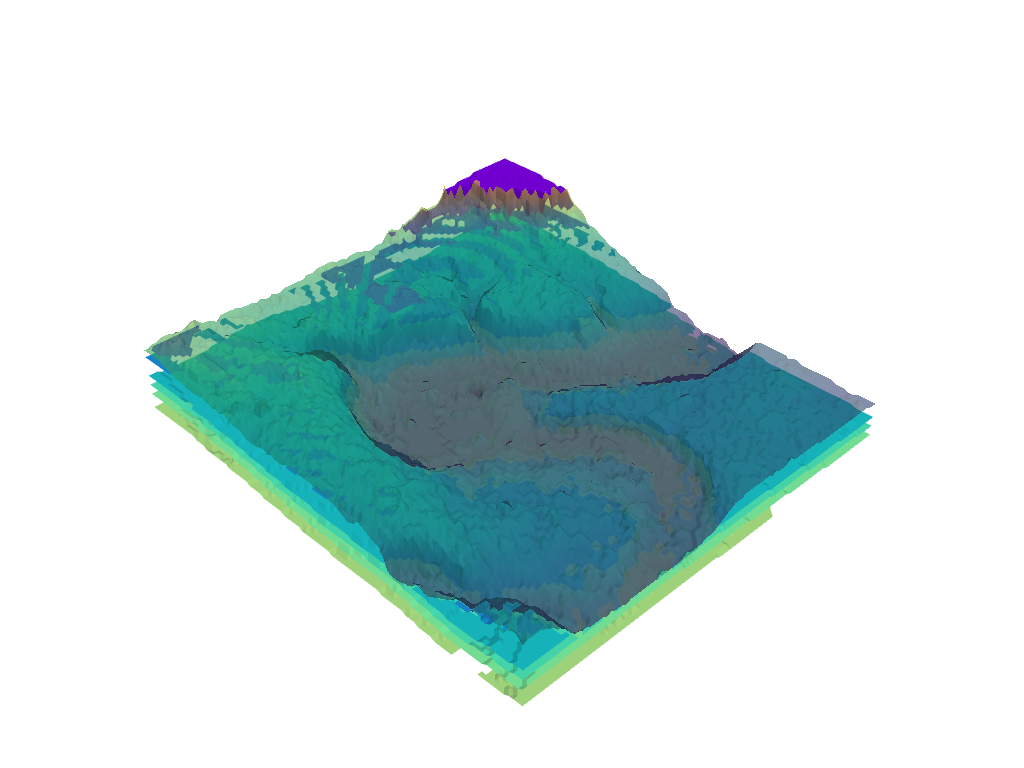

In [54]:
layers = [2, 3, 4, 8, 9, 10, 11]

pl = pv.Plotter(notebook=True)
color=iter(cm.rainbow(np.linspace(0,1,11)))
for idx in layers:
    grid = surface(x, y, z, idx)
    pl.add_mesh(grid, opacity=1, color=next(color), nan_color=None, nan_opacity=0)
grid = air(x, y, z)
pl.add_mesh(grid, scalars=grid.points[:, 2], opacity=0.6, cmap='viridis')
pl.export_vtkjs('foo')
pl.show()